# Classification of Banana's Sweatness

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd /content/drive/My\ Drive/ML/DIVE\ INTO\ CODE/individual_project

/content/drive/My Drive/ML/DIVE INTO CODE/individual_project


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

from keras import layers
from keras import models
from keras.models import load_model
from keras import optimizers
from keras import backend as K
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions


Using TensorFlow backend.


## データ準備

In [6]:
train_early_path = './data/train/1.early'
train_just_path = './data/train/2.just'
train_late_path = './data/train/3.late'
train_dammy_path = './data/train/4.dammy'
val_early_path = './data/validation/1.early'
val_just_path = './data/validation/2.just'
val_late_path = './data/validation/3.late'
val_dammy_path = './data/validation/4.dammy'
test_early_path = './data/test/1.early'
test_just_path = './data/test/2.just'
test_late_path = './data/test/3.late'
test_dammy_path = './data/test/4.dammy'

os.listdir(test_just_path)

['img_64.jpg', 'img_59.jpg', 'img_71.jpg', 'img_55.jpg', 'img_47.jpg']

## ファインチューニング

In [7]:
K.clear_session()

conv_base = VGG16(
    include_top=False, 
    weights='imagenet', 
    input_tensor=None, 
    input_shape=(224,224,3), 
    pooling=None, 
    classes=1000
)

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.summary()


conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

W0726 05:29:05.425595 140577378064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0726 05:29:05.427024 140577378064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0726 05:29:05.472852 140577378064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 05:29:05.474156 140577378064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W072

58892288/58889256 [==============================] - 5s 0us/step


W0726 05:29:14.394104 140577378064256 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
Total params: 27,562,308
Trainable params: 27,562,308
Non-trainable params: 0
_________________________________________________________________


In [8]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory='./data/train',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    directory='./data/validation',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical'
)


Found 393 images belonging to 4 classes.
Found 41 images belonging to 4 classes.


In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc']
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=500,
    epochs=10,
    validation_data=val_generator,
    validation_steps=10
)

W0726 05:29:18.047930 140577378064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 05:29:18.156128 140577378064256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
  8/500 [..............................] - ETA: 48:17 - loss: 1.3651 - acc: 0.3750

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


500/500 [==============================] - 377s 755ms/step - loss: 0.4610 - acc: 0.8255 - val_loss: 0.1875 - val_acc: 0.9024
Epoch 2/10
500/500 [==============================] - 160s 321ms/step - loss: 0.0842 - acc: 0.9725 - val_loss: 0.1320 - val_acc: 0.9512
Epoch 3/10
500/500 [==============================] - 160s 321ms/step - loss: 0.0375 - acc: 0.9868 - val_loss: 0.0870 - val_acc: 0.9512
Epoch 4/10
500/500 [==============================] - 160s 321ms/step - loss: 0.0237 - acc: 0.9918 - val_loss: 0.0551 - val_acc: 0.9756
Epoch 5/10
500/500 [==============================] - 161s 321ms/step - loss: 0.0144 - acc: 0.9950 - val_loss: 0.0625 - val_acc: 0.9756
Epoch 6/10
500/500 [==============================] - 161s 322ms/step - loss: 0.0097 - acc: 0.9964 - val_loss: 0.0307 - val_acc: 1.0000
Epoch 7/10
500/500 [==============================] - 162s 324ms/step - loss: 0.0055 - acc: 0.9988 - val_loss: 0.1548 - val_acc: 0.9756
Epoch 8/10
500/500 [==============================] - 160s 

float32


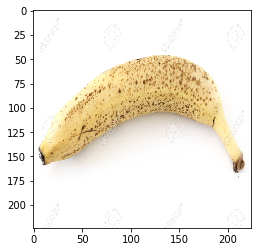

[[0. 1. 0. 0.]]
float32


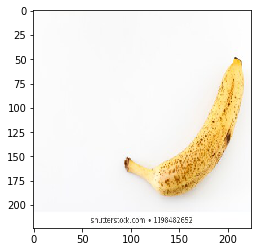

[[0. 1. 0. 0.]]
float32


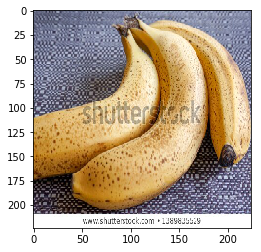

[[0. 1. 0. 0.]]
float32


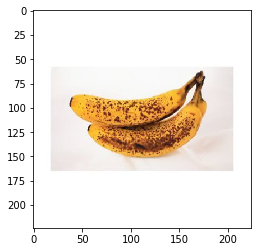

[[0. 1. 0. 0.]]
float32


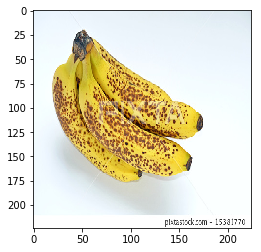

[[0. 1. 0. 0.]]


In [10]:
for i in os.listdir(test_just_path):
    img = image.load_img(os.path.join(test_just_path, i), target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    print(x.dtype)
    preds = model.predict(x)
    plt.imshow(x.reshape(224,224,3)/255)
    plt.show()
    print(preds)

In [0]:
model.save('banana2.h5')

In [0]:
K.clear_session()

model = load_model('banana2.h5')

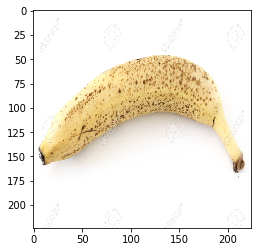

just


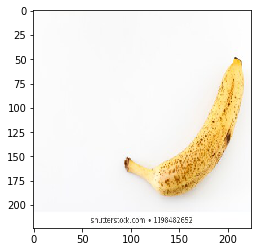

just


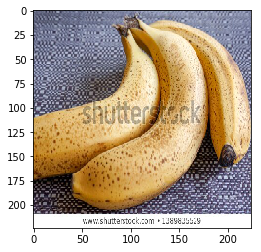

just


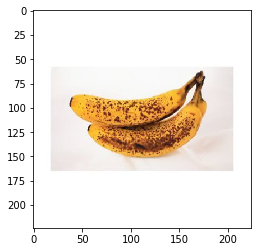

just


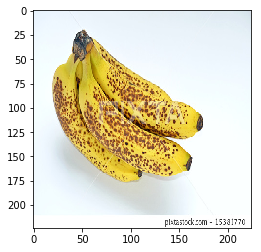

just


In [13]:
category = np.array(['early', 'just', 'late', 'not_banana'])

for i in os.listdir(test_just_path):
    img = image.load_img(os.path.join(test_just_path, i), target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    plt.imshow(x.reshape(224,224,3)/255)
    plt.show()
    print(category[np.argmax(preds)])

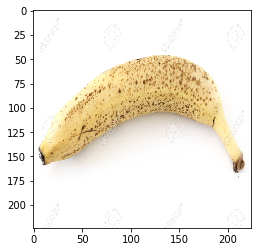

just


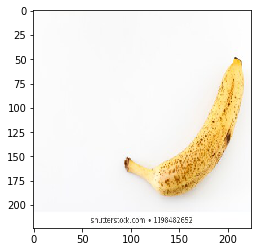

just


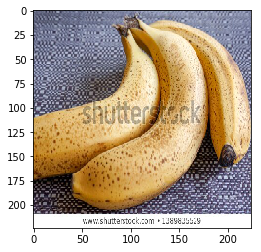

just


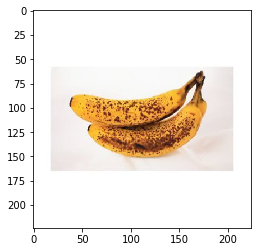

just


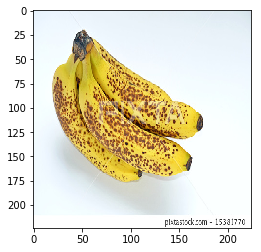

just


In [14]:
category = np.array(['early', 'just', 'late', 'not_banana'])

for i in os.listdir(test_just_path):
    img = image.load_img(os.path.join(test_just_path, i), target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    plt.imshow(x.reshape(224,224,3)/255)
    plt.show()
    print(category[np.argmax(preds)])

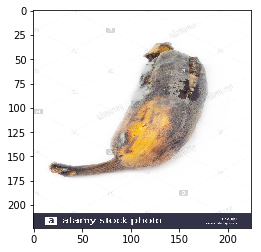

not_banana


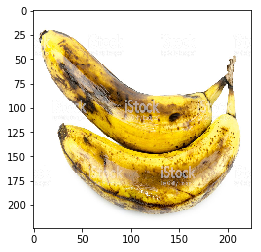

late


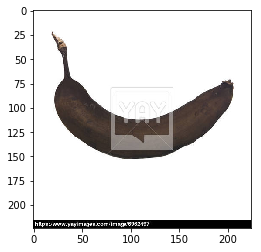

late


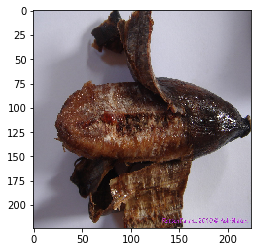

not_banana


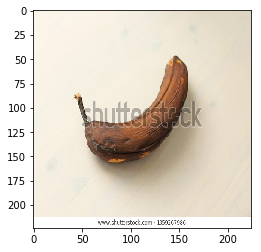

not_banana


In [15]:
for i in os.listdir(test_late_path):
    img = image.load_img(os.path.join(test_late_path, i), target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    plt.imshow(x.reshape(224,224,3)/255)
    plt.show()
    print(category[np.argmax(preds)])

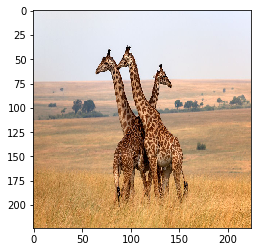

not_banana


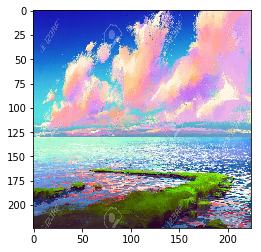

not_banana


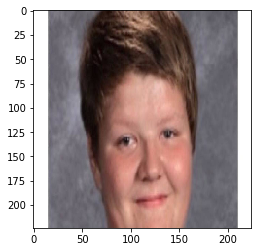

not_banana


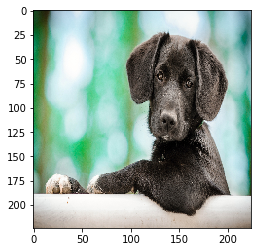

not_banana


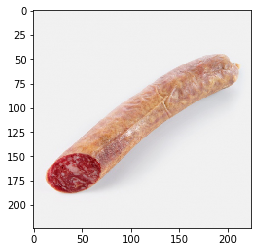

not_banana


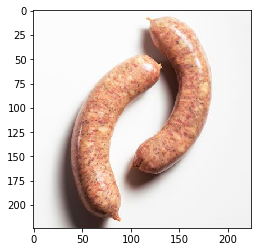

not_banana


In [16]:
for i in os.listdir(test_dammy_path):
    img = image.load_img(os.path.join(test_dammy_path, i), target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    plt.imshow(x.reshape(224,224,3)/255)
    plt.show()
    print(category[np.argmax(preds)])